In [1]:
import numpy as np
import os,sys

sys.path.append('.')
sys.path.append('../RL_lib/Utils')
%load_ext autoreload
%load_ext autoreload
%autoreload 2
%matplotlib nbagg
import os
print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/briangaudet/Study/Subjects/MachineLearning/Projects/MetaLearning_SBIR-master/Imaging


In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

# Image a cube's vertices
## grayscale: 0 is black, higher intensities are lighter
## here intensities are ranges.  so foreground should have smaller range, and therefore be darker
## Optical axis +Z (default)

# Centered

Euler321 Attitude
(738, 2)
(738, 1)
Euler321 Attitude
Overriding focal length using FOV:  0.7853981633974483 13.361957121094465
K: 
[[133.61957121  20.          50.        ]
 [  0.         133.61957121  50.        ]
 [  0.           0.           1.        ]]
C_cb: 
[[ 1.  0. -0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
t: 
ET:  0.004895210266113281


<IPython.core.display.Javascript object>


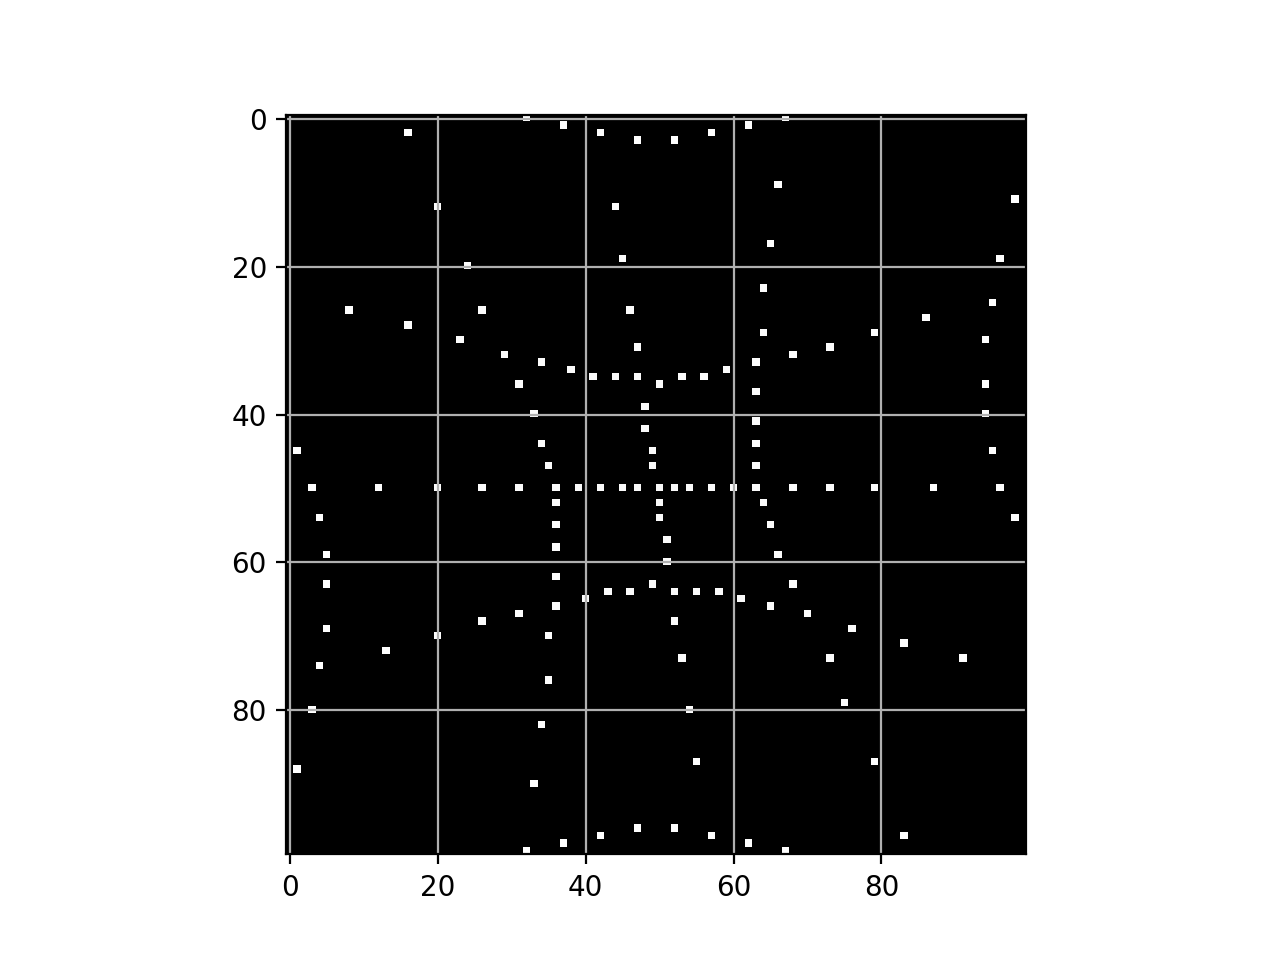

In [11]:
from camera_model_distort import Camera_model
import attitude_utils as attu
import optics_utils as optu
import itertools
from time import time
ap = attu.Euler_attitude()

object_locations = optu.make_cube(10.,1.0*np.asarray([0,0,200]))
object_locations = optu.make_grid()
print(object_locations.shape)
z = np.expand_dims(400*np.ones(object_locations.shape[0]),axis=1)
print(z.shape)
object_locations=np.hstack((object_locations,z))
#print(object_locations)
agent_location = 1.0*np.asarray([0,0,100])
object_intensities = np.linalg.norm(object_locations-agent_location,axis=1)-50
fov=np.pi/4


yaw = 0.0
pitch = 0.0
roll = 0.0
agent_q = np.asarray([yaw,pitch,roll])


C_cb = optu.rotate_optical_axis(0.0, 0.0, 0.0)
r_cb = np.asarray([0,0,0])

k=-0.9
p=0.1
K0 = np.zeros(3)
K1 = [2.0,0.5,0.0]
K2 = [5.0,10.0,0.0]
K3 = [20.,40.,0.0]
K4 = [50,100,0]
#K3 = [-1.0,-5.0,0.0]
K = K3
P0 = np.zeros(2)
P1 = [0.1,0.1]
P = P0
cm = Camera_model(attitude_parameterization=ap, C_cb=C_cb, r_cb=r_cb, slant=20.0,
                   fov=fov, debug=False, p1=P[0], p2=P[1], k1=K[0],k2=K[1],k3=K[2])
t0 = time()
pix1 = cm.get_pixel_coords(agent_location, agent_q, object_locations, object_intensities)
t1 = time()
print('ET: ',t1-t0)

cm.render(agent_location, agent_q, object_locations, object_intensities)


# Positive Roll, Image should move down in FOV

Euler321 Attitude
Overriding focal length using FOV:  0.7853981633974483 13.361957121094465
K: 
[[133.61957121   0.          50.        ]
 [  0.         133.61957121  50.        ]
 [  0.           0.           1.        ]]
C_cb: 
[[ 1.  0. -0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
t: 
pixel_locs.shape:  (8, 2)
ET:  0.0016019344329833984
pixel_locs.shape:  (8, 2)
(8, 2) (8,) (8,)


<IPython.core.display.Javascript object>


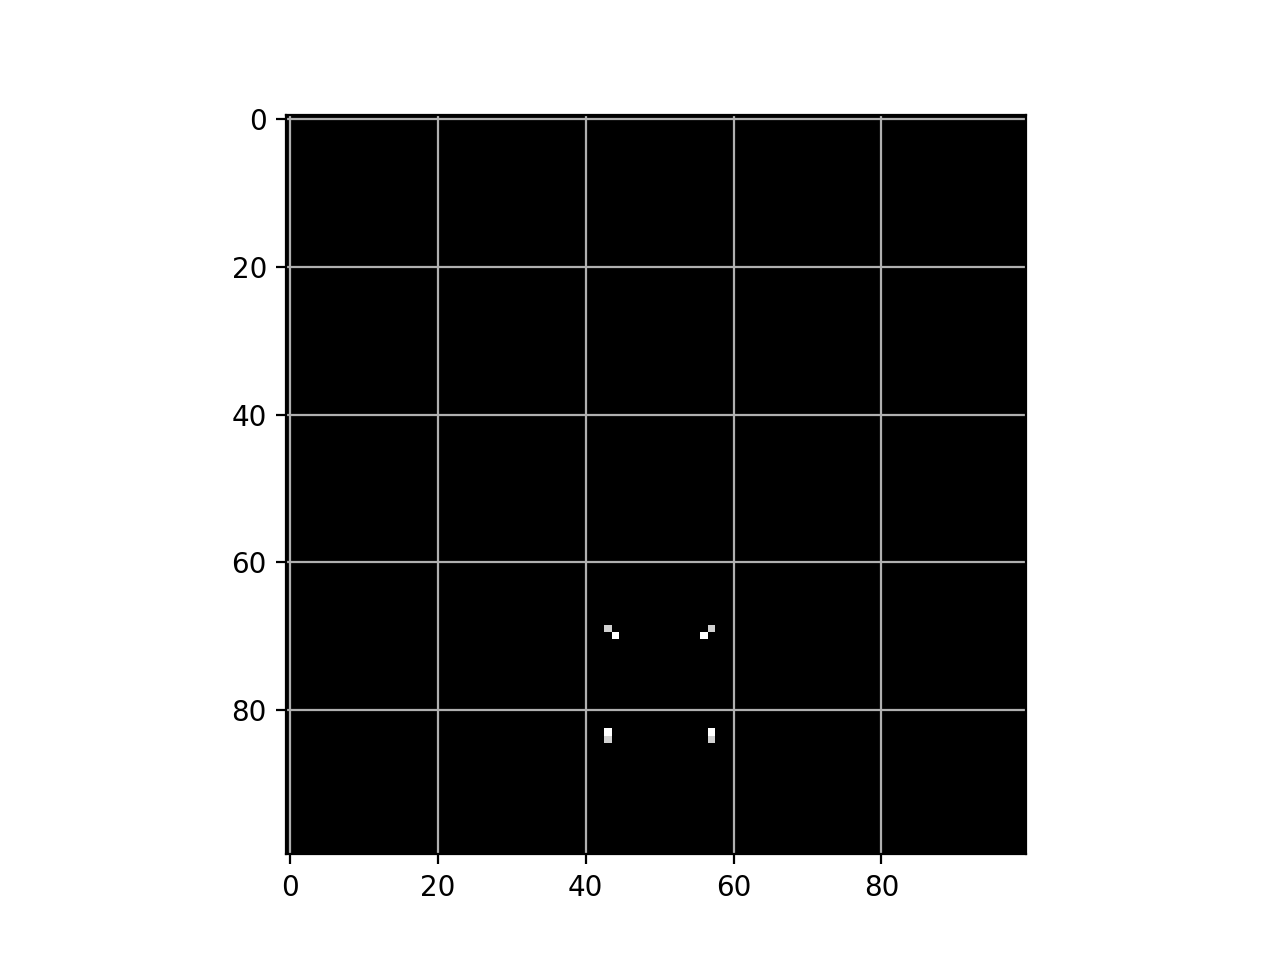

Image values:  0.0 55.23782589924595


In [23]:
object_locations = optu.make_cube(10.,1.0*np.asarray([0,0,200]))

agent_location = 1.0*np.asarray([0,0,100])
object_intensities = np.linalg.norm(object_locations-agent_location,axis=1)-50
fov=np.pi/4


yaw = 0.0
pitch = 0.0
roll = np.pi/16
agent_q = np.asarray([yaw,pitch,roll])


C_cb = optu.rotate_optical_axis(0.0, 0.0, 0.0)
r_cb = np.asarray([0,0,0])


cm = Camera_model(attitude_parameterization=ap, C_cb=C_cb, r_cb=r_cb,
                   fov=fov, debug=False)
t0 = time()
pix1 = cm.get_pixel_coords(agent_location, agent_q, object_locations, object_intensities)
t1 = time()
print('ET: ',t1-t0)

cm.render(agent_location, agent_q, object_locations, object_intensities)


# Negative Pitch, Image should move right

Euler321 Attitude
Overriding focal length using FOV:  0.7853981633974483 13.361957121094465
K: 
[[133.61957121   0.          50.        ]
 [  0.         133.61957121  50.        ]
 [  0.           0.           1.        ]]
C_cb: 
[[ 1.  0. -0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
t: 
pixel_locs.shape:  (8, 2)
ET:  0.0051801204681396484
pixel_locs.shape:  (8, 2)
(8, 2) (8,) (8,)


<IPython.core.display.Javascript object>


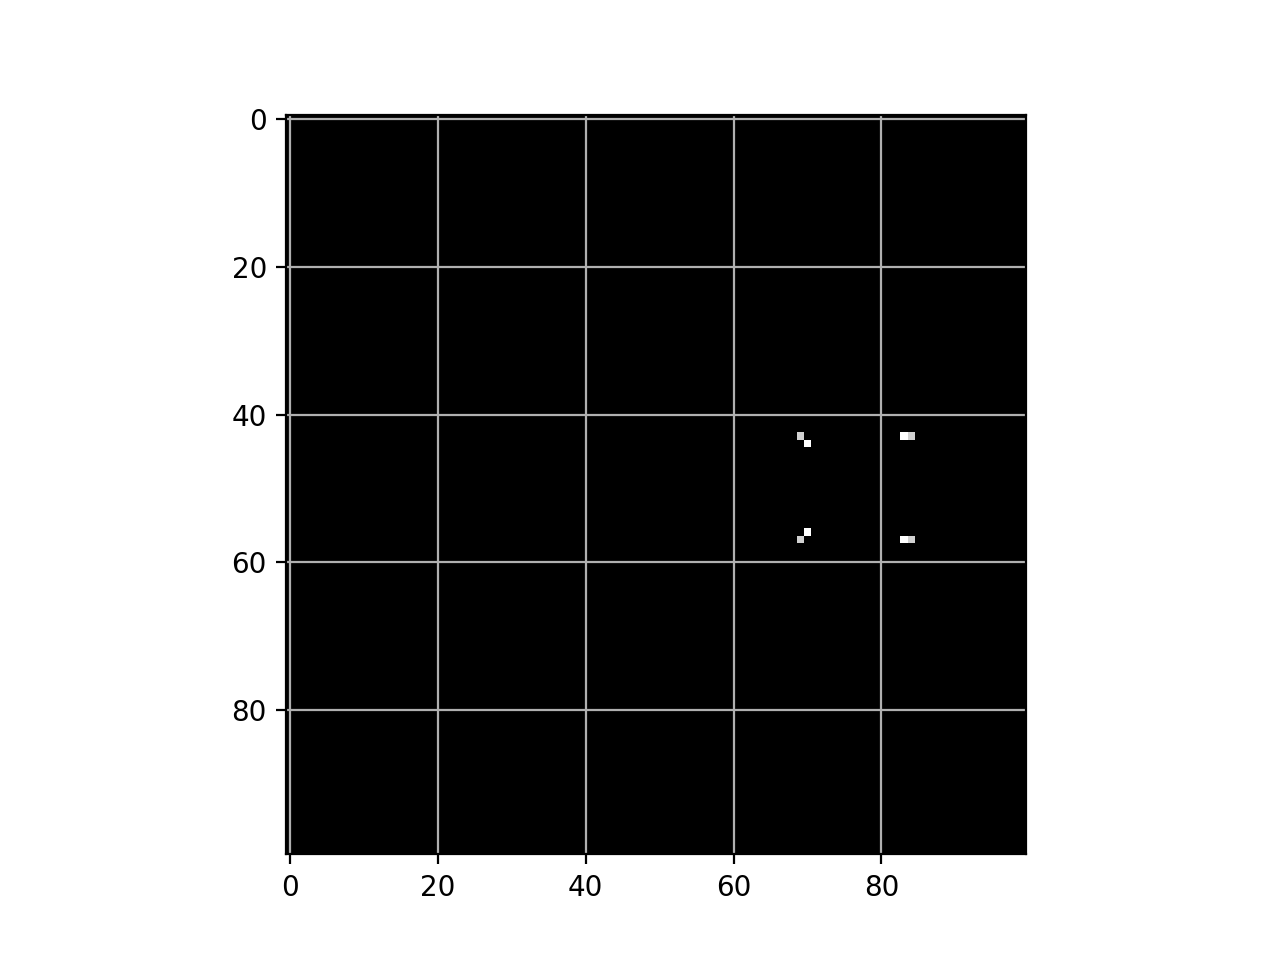

Image values:  0.0 55.23782589924595


In [24]:
object_locations = optu.make_cube(10.,1.0*np.asarray([0,0,200]))

agent_location = 1.0*np.asarray([0,0,100])
object_intensities = np.linalg.norm(object_locations-agent_location,axis=1)-50
fov=np.pi/4


yaw = 0.0
pitch = -np.pi/16
roll = 0.0
agent_q = np.asarray([yaw,pitch,roll])


C_cb = optu.rotate_optical_axis(0.0, 0.0, 0.0)
r_cb = np.asarray([0,0,0])


cm = Camera_model(attitude_parameterization=ap, C_cb=C_cb, r_cb=r_cb,
                   fov=fov, debug=False)
t0 = time()
pix1 = cm.get_pixel_coords(agent_location, agent_q, object_locations, object_intensities)
t1 = time()
print('ET: ',t1-t0)

cm.render(agent_location, agent_q, object_locations, object_intensities)


# Positive Yaw should rotate image

Euler321 Attitude
Overriding focal length using FOV:  0.7853981633974483 13.361957121094465
K: 
[[133.61957121   0.          50.        ]
 [  0.         133.61957121  50.        ]
 [  0.           0.           1.        ]]
C_cb: 
[[ 1.  0. -0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
t: 
pixel_locs.shape:  (8, 2)
ET:  0.0015840530395507812
pixel_locs.shape:  (8, 2)
(8, 2) (8,) (8,)


<IPython.core.display.Javascript object>


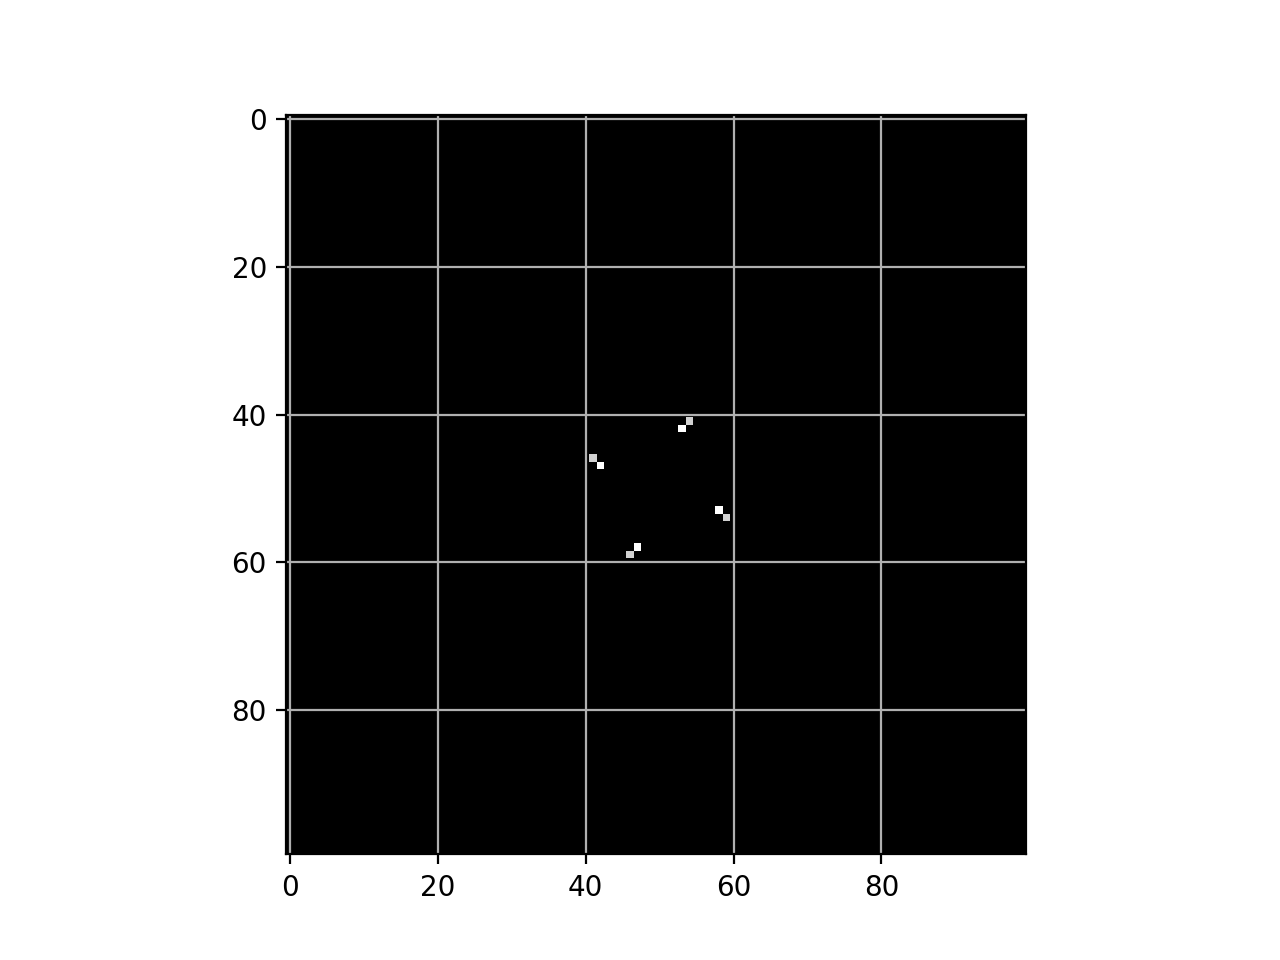

Image values:  0.0 55.23782589924595


In [25]:
object_locations = optu.make_cube(10.,1.0*np.asarray([0,0,200]))

agent_location = 1.0*np.asarray([0,0,100])
object_intensities = np.linalg.norm(object_locations-agent_location,axis=1)-50
fov=np.pi/4


yaw = np.pi/8
pitch = 0.0
roll = 0.0
agent_q = np.asarray([yaw,pitch,roll])


C_cb = optu.rotate_optical_axis(0.0, 0.0, 0.0)
r_cb = np.asarray([0,0,0])


cm = Camera_model(attitude_parameterization=ap, C_cb=C_cb, r_cb=r_cb,
                   fov=fov, debug=False)
t0 = time()
pix1 = cm.get_pixel_coords(agent_location, agent_q, object_locations, object_intensities)
t1 = time()
print('ET: ',t1-t0)

cm.render(agent_location, agent_q, object_locations, object_intensities)


In [27]:
print(np.linspace(-100,100,11))

[-100.  -80.  -60.  -40.  -20.    0.   20.   40.   60.   80.  100.]


In [28]:
print(np.linspace(-4,4,9))

[-4. -3. -2. -1.  0.  1.  2.  3.  4.]


In [32]:
x = np.linspace(-7,7,15)
p = np.linspace(-3,3,7)
for i in range(p.shape[0]):
    line = np.stack((x,p[i]*np.ones_like(x)))
    print(line)

[[-7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.]
 [-3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3.]]
[[-7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.]
 [-2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.]]
[[-7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]
[[-7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[-7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
[[-7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]]
[[-7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]]
